In [16]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../../data/archive/ST001937_AN003150.csv')

Dropping not needed columns and renaming the Phenotypes column to labels

In [17]:
df = df.drop(['Sample ID', 'RAW_FILE_NAME'], axis=1)
df['Phenotypes'] = df['Phenotypes'].apply(lambda x: 0 if x == 'Healthy Controls' else 1)


#balancing the dataset
df = df.groupby('Phenotypes').apply(lambda x: x.sample(n=150)).reset_index(drop = True)
df.describe()

,Phenotypes,"1,3,5(10)-estratrien-3,6- beta-17-beta-triol","1,5-anhydroglucitol",17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-1,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-2,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-3,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-4,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-5,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-6,1-hexadecanol,...,tyrosine-1,tyrosine-2,urea-1,urea-2,urea-3,urea-4,uridine,valine,xanthine,xanthosine
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.500000,1.147696,0.913910,1.055484,0.679244,0.970889,0.377914,1.145285,1.075247,1.051133,...,0.997319,1.032545,1.051193,1.024618,1.051214,1.594796,2.440285,0.787260,1.014156,0.670793
std,0.500835,8.796350,1.272361,0.673465,1.948073,1.131702,12.568995,1.402335,1.026923,0.635419,...,0.772795,0.812241,0.754881,0.952225,0.728683,5.260025,15.597852,2.011610,1.993682,2.373106
min,0.000000,-19.252257,-1.253954,0.046550,-7.799634,0.020926,-215.131930,0.073615,0.061957,0.271087,...,0.187713,0.016541,0.000060,0.004070,0.000614,0.016716,-4.725367,-23.009451,0.011635,-22.892444
25%,0.000000,0.048622,0.505286,0.651154,0.023179,0.134358,0.576842,0.558715,0.580685,0.844582,...,0.715013,0.775498,0.717462,0.531766,0.727680,0.106715,0.046635,0.200988,0.285863,0.127048
50%,0.500000,0.133159,0.804875,0.908222,0.248980,0.660519,0.979515,0.926385,0.866815,0.958122,...,0.875941,0.951787,0.947252,0.914612,0.951581,0.172502,0.161594,0.386188,0.571742,0.487782
75%,1.000000,0.531405,1.076990,1.279649,0.820205,1.530541,1.397035,1.267040,1.281605,1.101774,...,1.087273,1.227773,1.255260,1.347325,1.235069,0.337100,0.621058,0.902256,1.105228,1.244432
max,1.000000,126.860070,18.650614,5.798107,14.101446,10.174921,22.084354,19.882009,10.946557,8.076066,...,9.094503,11.647518,10.149729,13.078118,10.244206,48.041776,247.300761,13.154810,26.689009,14.371441


Filling missing values with the mean

In [18]:
df.fillna(df.mean(), inplace=True)

Performing SVM linear classification and plotting the results

auc: 0.8632891172998125


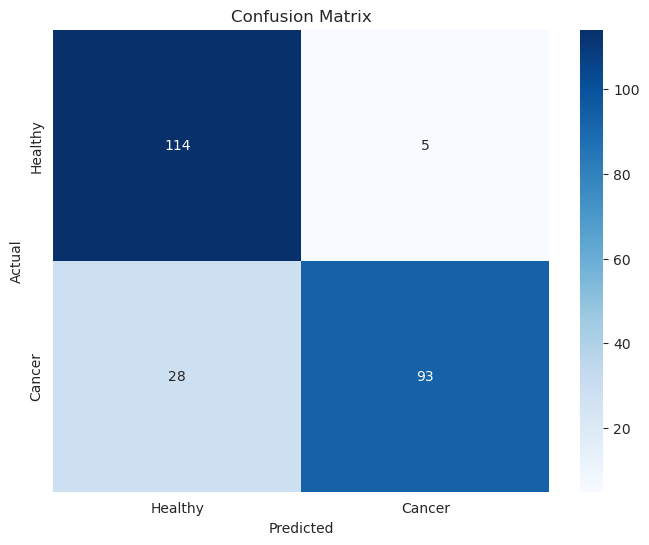

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Separating features and target variable
X = df.drop('Phenotypes', axis=1)
y = df['Phenotypes']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM linear classification
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance
conf_matrix = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"auc: {auc}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
